In [1]:
import pandas as pd

In [2]:
path = 'Heart_disease_cleveland_new.csv'
df = pd.read_csv(path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
X = df.drop(columns=['target'])
y = df['target']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler
# Normalize the data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_test)

print(f"Training set shape: {X_train.shape}, Validation set shape: {X_val.shape}")

Training set shape: (242, 13), Validation set shape: (61, 13)


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Input # type: ignore
from tensorflow.keras.optimizers import SGD # type: ignore
import numpy as np

In [53]:
# Define a simple MLP model

def create_model(hidden_layers_neuron, activation='relu', optimizer_type='sgd', learning_rate=0.001):
    model = Sequential()
    model.add(Input(shape=(X.shape[1], )))
    # model.add(Dense(X_train.shape[1], activation='relu', input_shape=(X_train.shape[1],)))

    for layer_neuron in hidden_layers_neuron:
        model.add(Dense(layer_neuron, activation=activation))

    model.add(Dense(1, activation='sigmoid'))

    # Optimizer selection
    if optimizer_type.lower() == 'SGD':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_type.lower() == 'GD':
        optimizer = SGD(learning_rate=learning_rate, momentum=0.0)
        
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
# Train
from tensorflow.keras.callbacks import EarlyStopping  # type: ignore

def train_model(model, epochs=100, batch_size=32):
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=epochs,
        # validation_split=0.1,
        callbacks=[early_stopping],
        verbose=0
    )
    
    return history

In [ ]:
import matplotlib.pyplot as plt

def plot_model(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

In [48]:
configs = [
    {
        'name': 'config1',
        'hidden_layers_neuron': [32],
        'learning_rate': 0.01,
        'activation_function': 'relu',
        'optimization': 'sgd'
    },
    {
        'name': 'config2',
        'hidden_layers_neuron': [32, 64],
        'learning_rate': 0.001,
        'activation_function': 'relu',
        'optimization': 'gd'
    },
    {
        'name': 'config3',
        'hidden_layers_neuron': [16],
        'learning_rate': 0.001,
        'activation_function': 'relu',
        'optimization': 'gd'
    },
    {
        'name': 'config4',
        'hidden_layers_neuron': [16, 32],
        'learning_rate': 0.005,
        'activation_function': 'relu',
        'optimization': 'sgd'
    },
]

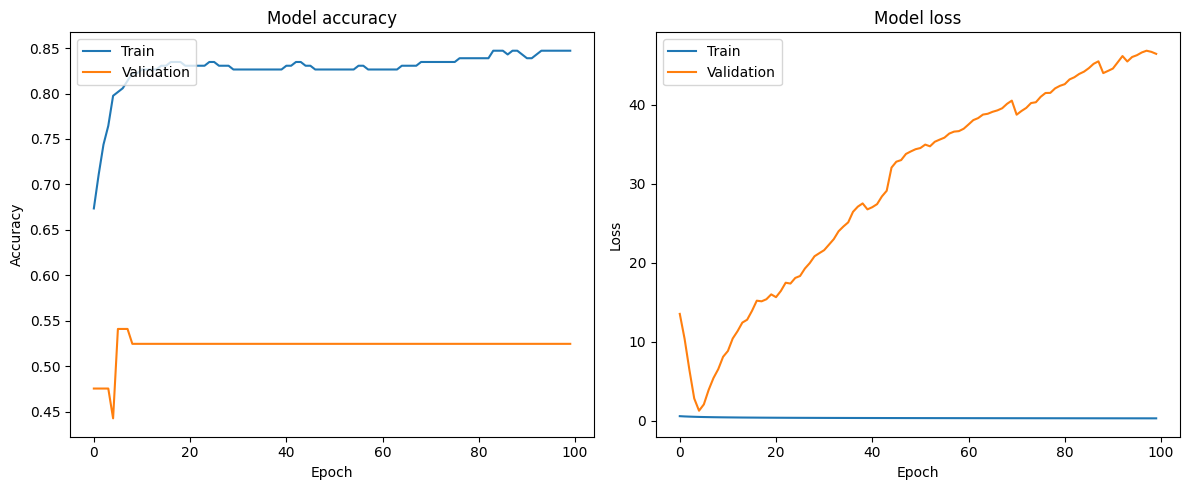

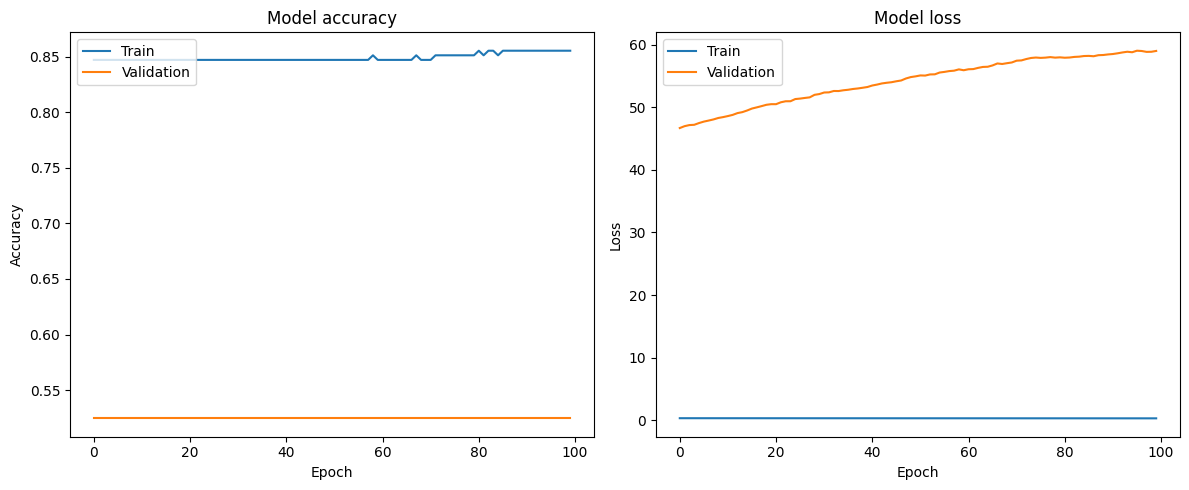

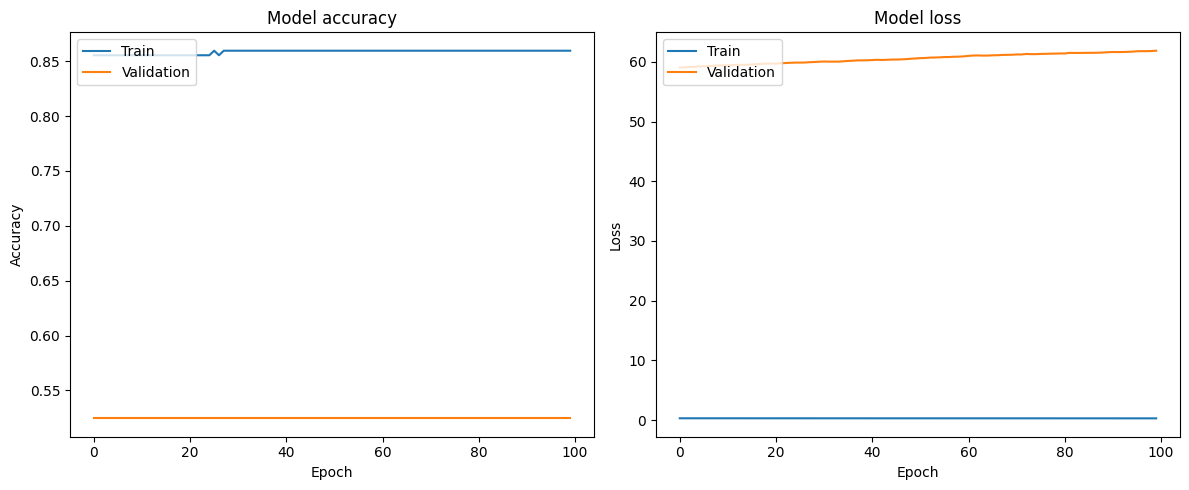

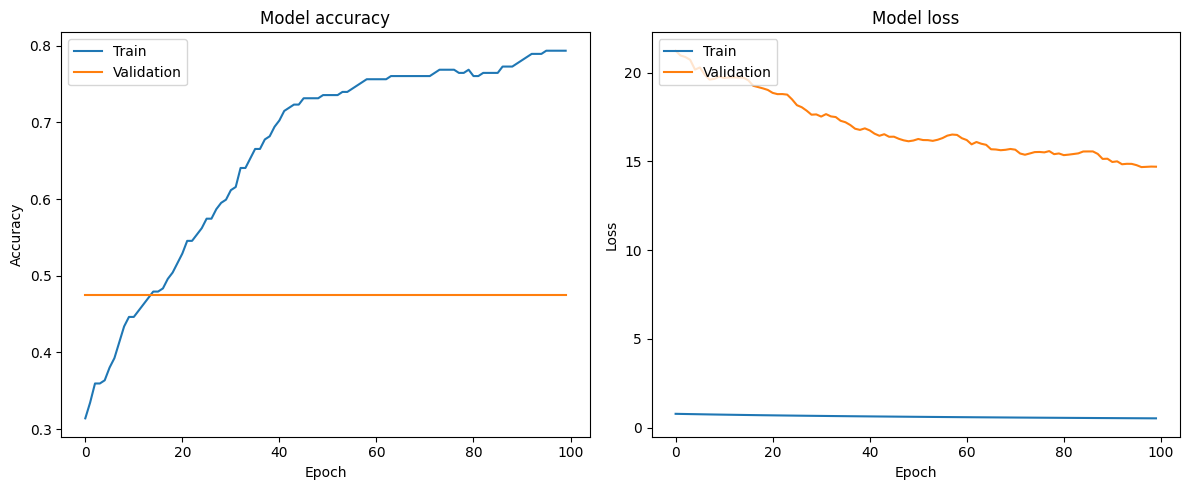

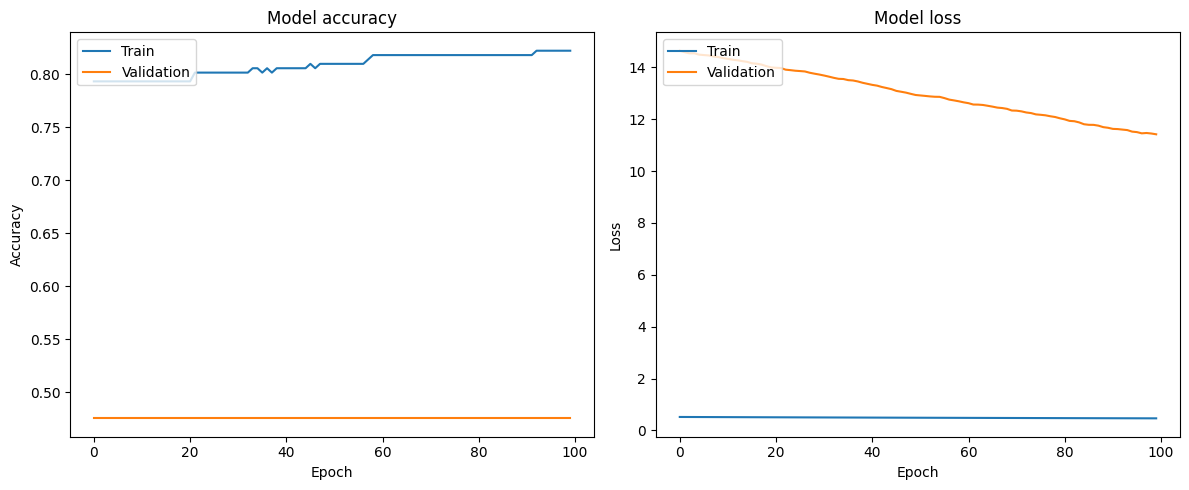

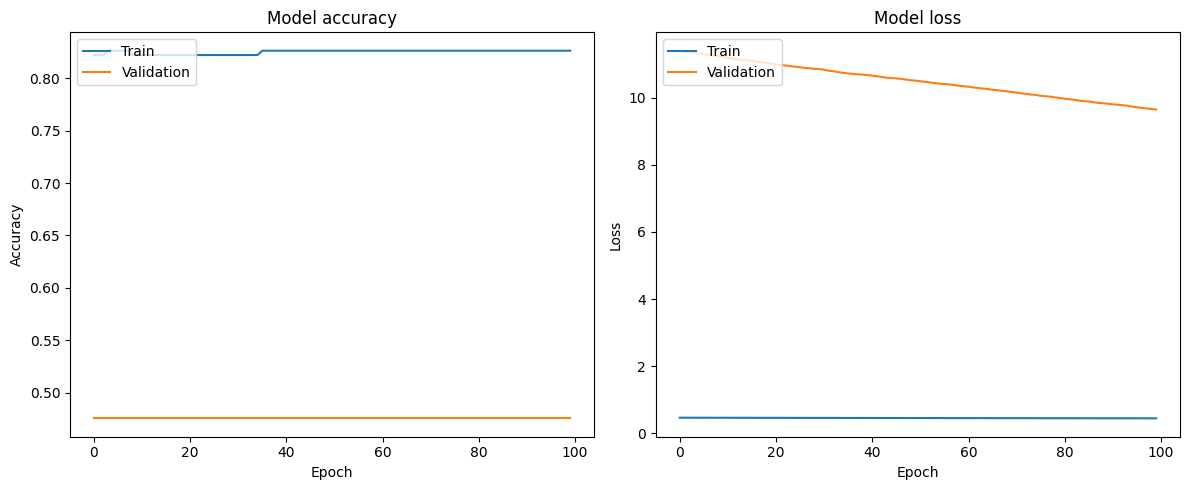

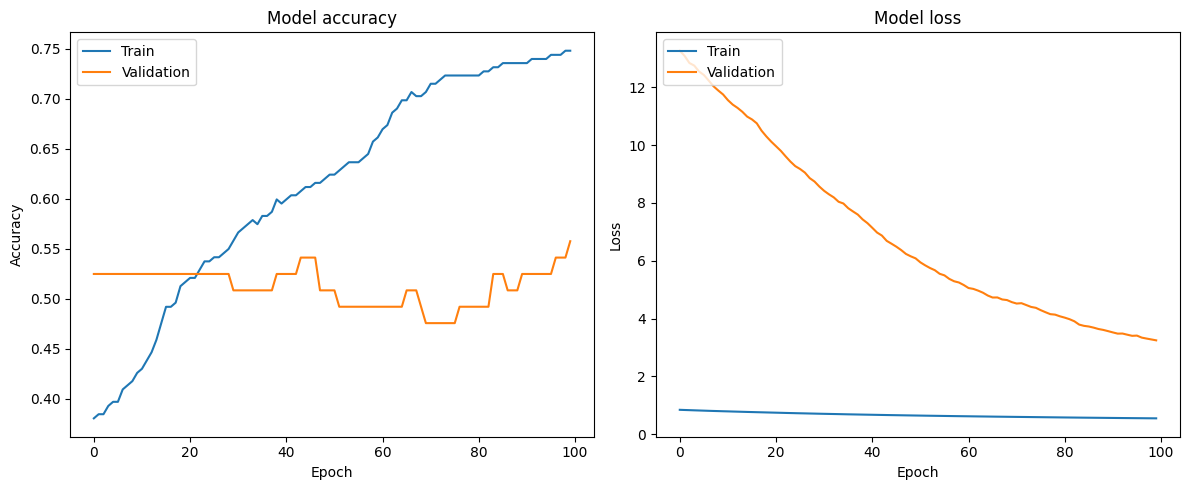

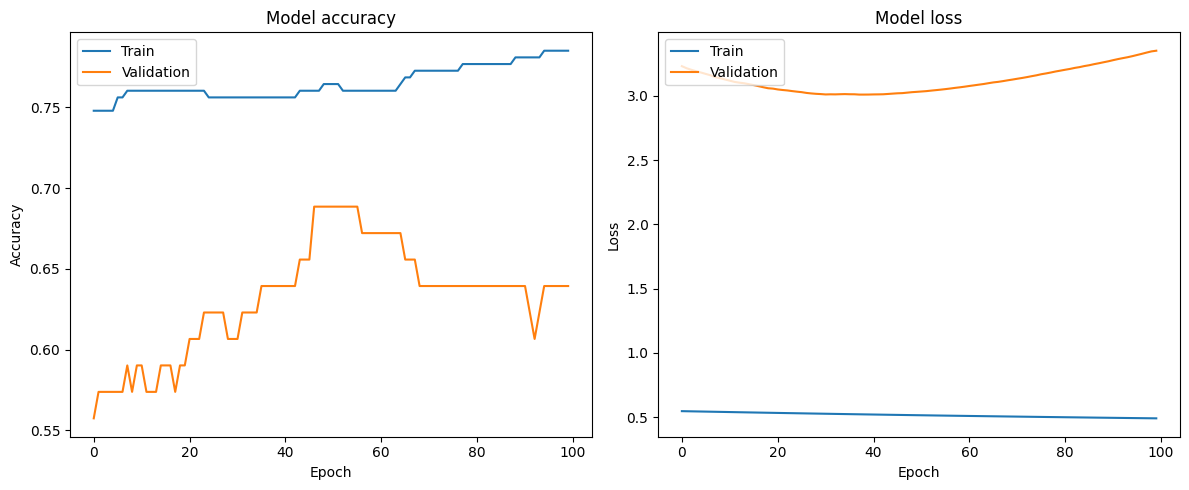

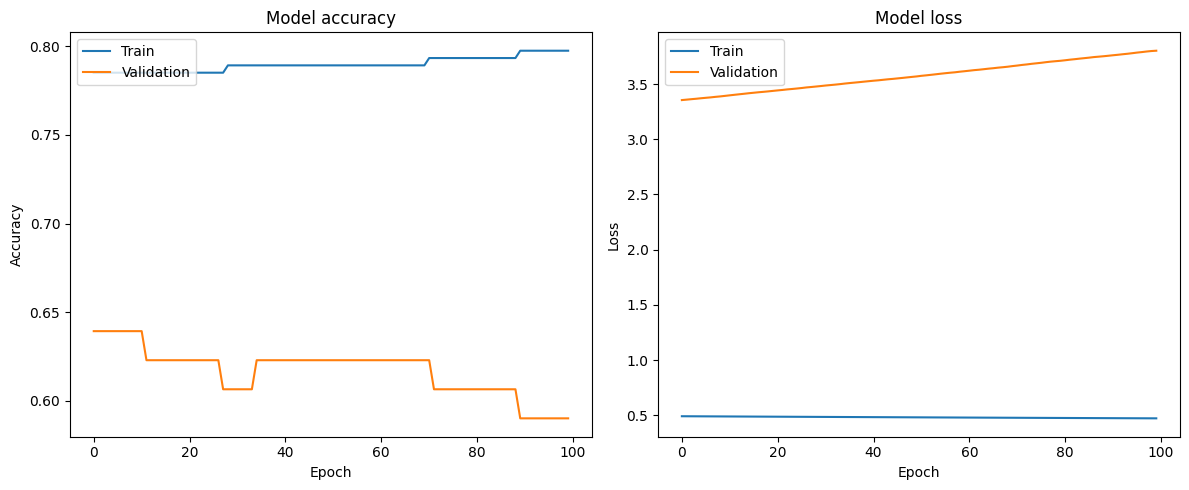

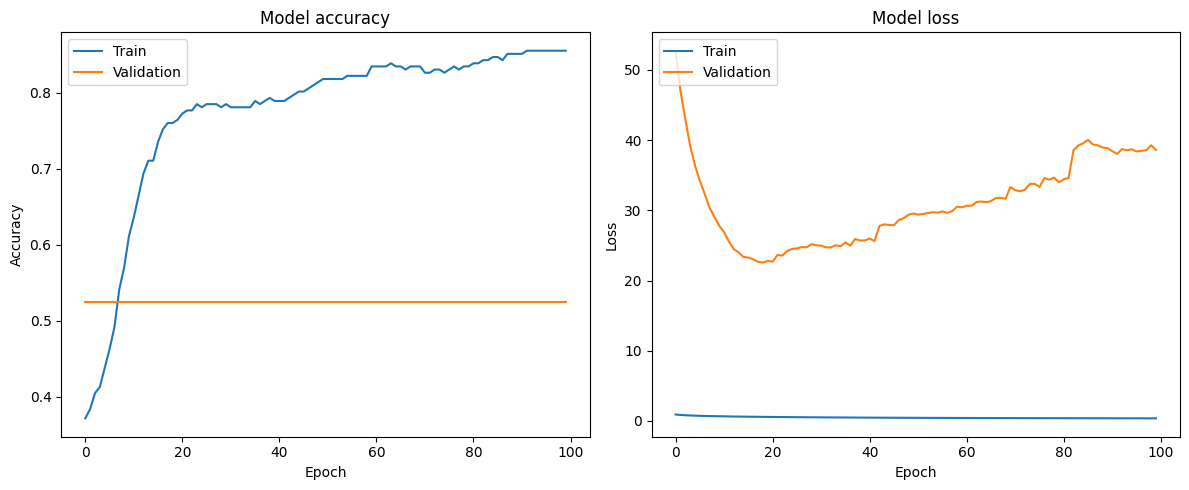

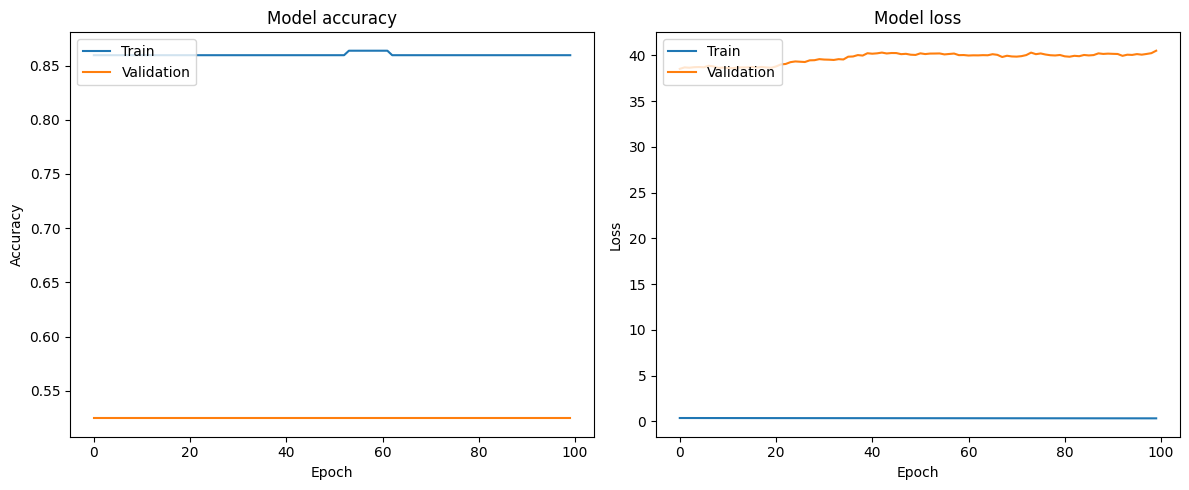

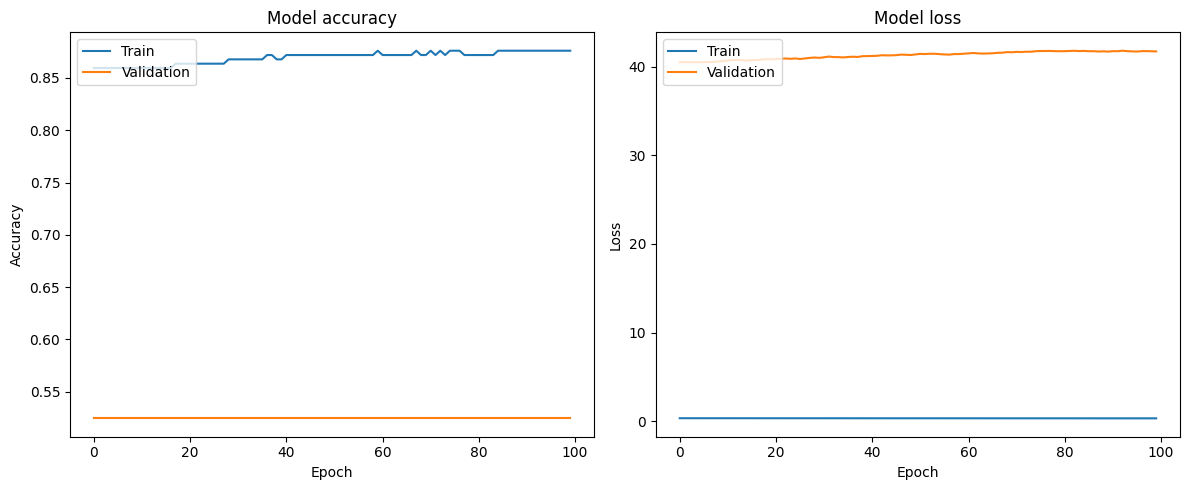

In [ ]:
results = {}

for config in configs:
    print(f"\nTraining {config['name']}:")
    print(f"Hidden layers: {config['hidden_layers_neuron']}")
    print(f"Learning rate: {config['learning_rate']}, Optimizer: {config['optimization']}")
    
    model = create_model(
        hidden_layers_neuron=config['hidden_layers_neuron'],
        activation=config['activation_function'],
        optimizer_type=config['optimization'],
        learning_rate=config['learning_rate']
    )

    batch_sizes = [16, 32, 64]
    for batch_size in batch_sizes:
        history = train_model(model, epochs=100, batch_size=batch_size)

        # Store results
        results[config['name']] = {
            'model': model,
            'history': history,
            'config': config
        }

        plot_model(history)

In [ ]:
from sklearn.metrics import accuracy_score

def evaluate_model():
    y_pred = model.predict(X_test)
    # Convert probabilities to binary labels (0 or 1)
    y_pred = (y_pred > 0.5).astype(int)

    accuracy_score(y_test, y_pred)

0.8360655737704918